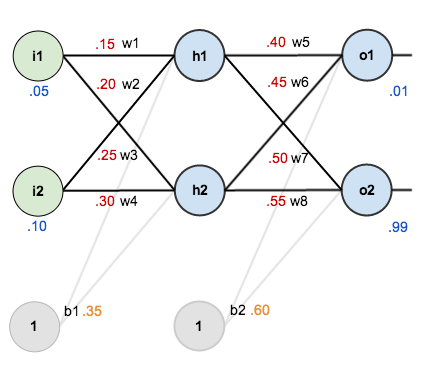

In [2]:
from IPython.display import Image
Image("image.png") 

In [12]:
##############################################################################
# Implementation of a A Step by Step Backpropagation Example by Matt Mazur
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
##############################################################################

# Original code: https://github.com/vendidad/DS-repo/blob/master/Backpropagation%20-%20Consolidated%20Script.ipynb
        
        
import numpy as np
np.set_printoptions(precision=4)

def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(100000)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)
    
def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
        print("Error at iteration {} = {}".format(iter, E))
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))

main()

Error at iteration 0 = 0.2983711087600027
Error at iteration 1 = 0.2910480908320955
Error at iteration 2 = 0.28358842420926683
Error at iteration 3 = 0.2760060823602585
Error at iteration 4 = 0.2683174402773854
Error at iteration 5 = 0.26054118067111026
Error at iteration 6 = 0.25269812339802494
Error at iteration 7 = 0.24481097557356962
Error at iteration 8 = 0.23690400436993972
Error at iteration 9 = 0.2290026395880884
Error at iteration 10 = 0.22113301827229542
Error at iteration 11 = 0.21332148837003917
Error at iteration 12 = 0.2055940921749489
Error at iteration 13 = 0.19797605254116196
Error at iteration 14 = 0.19049128529191797
Error at iteration 15 = 0.18316195975067923
Error at iteration 16 = 0.17600812603330224
Error at iteration 17 = 0.16904742301895564
Error at iteration 18 = 0.16229487530116218
Error at iteration 19 = 0.15576278152737316
Error at iteration 20 = 0.14946069097012982
Error at iteration 21 = 0.14339546043821566
Error at iteration 22 = 0.1375713800748222
Error

# 1 
Yes, Error reduces incrementally when we increase the iterations